In [1]:
# Import necessary libraries.

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the dataset

df = pd.read_csv('techsavvy_ab_test_data.csv')



In [13]:
# Display the first few rows of the dataframe to ensure it's loaded correctly
df.head(5)

,user_id,group,timestamp,clicked_add_to_cart,session_duration
0,1,A,7/1/2024 0:00,0,66
1,2,B,7/1/2024 0:01,0,54
2,3,A,7/1/2024 0:02,0,41
3,4,A,7/1/2024 0:03,0,51
4,5,A,7/1/2024 0:04,0,44


In [14]:
# Display the last few rows of the dataframe to ensure it's loaded correctly
df.tail(5)

,user_id,group,timestamp,clicked_add_to_cart,session_duration
9995,9996,B,7/7/2024 22:35,0,45
9996,9997,A,7/7/2024 22:36,0,45
9997,9998,B,7/7/2024 22:37,0,55
9998,9999,B,7/7/2024 22:38,0,67
9999,10000,A,7/7/2024 22:39,0,64


In [8]:
# 1. Calculate Conversion Rates.

# A/B Testing: Comparing two versions of a webpage to determine which one performs better.
# Group A: Control group with the original version.
# Group B: Treatment group with the modified version.


# Conversion Rate: The percentage of users who click the "Add to Cart" button

conversion_A = df[df['group'] == 'A']['clicked_add_to_cart'].mean()
conversion_B = df[df['group'] == 'B']['clicked_add_to_cart'].mean()

print(f"Conversion Rate A: {conversion_A:.2f}")
print(f"Conversion Rate B: {conversion_B:.2f}")


Conversion Rate A: 0.10
Conversion Rate B: 0.12


In [9]:
# 2. Perform Statistical Tests.

# T-Test: A statistical test to determine if there are significant differences between the means of two groups.
# Null Hypothesis: There is no difference in conversion rates between Group A and Group B.
# Alternative Hypothesis: There is a difference in conversion rates between Group A and Group B.

# Perform t-test
t_stat, p_value_ttest = stats.ttest_ind(
    df[df['group'] == 'A']['clicked_add_to_cart'],
    df[df['group'] == 'B']['clicked_add_to_cart']
)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value (t-test): {p_value_ttest:.4f}")


T-Statistic: -2.41
P-Value (t-test): 0.0159


In [10]:
# Perform chi-square test

# Chi-Square Test: A statistical test to determine if there is a significant association between two categorical variables.
# Null Hypothesis: There is no association between the group and the clicked "Add to Cart" button.
# Alternative Hypothesis: There is an association between the group and the clicked "Add to Cart" button.

contingency_table = pd.crosstab(df['group'], df['clicked_add_to_cart'])
chi2_stat, p_value_chi2, _, _ = stats.chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat:.2f}")
print(f"P-Value (chi-square): {p_value_chi2:.4f}")


Chi-Square Statistic: 5.66
P-Value (chi-square): 0.0173


/tmp/ipykernel_40517/3551270136.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='group', y='clicked_add_to_cart', data=df, ci=None)


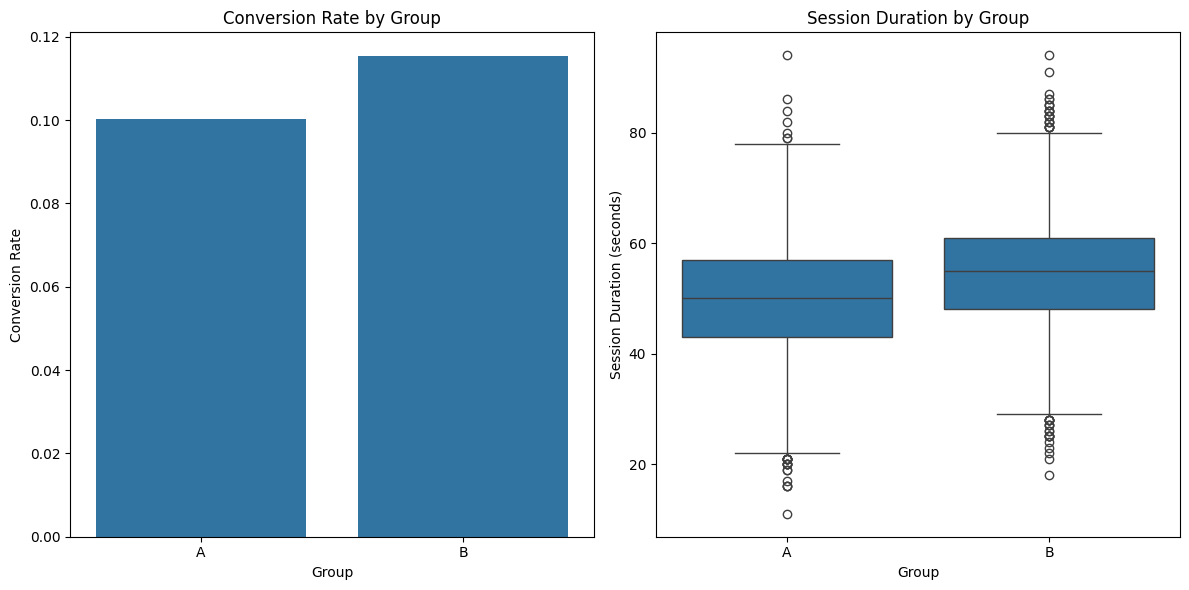

In [11]:
# 3. Visualize the Findings.

# Visualization
plt.figure(figsize=(12, 6))

# Bar plot of conversion rates by group.
# Conversion Rate: The percentage of users who click the "Add to Cart" button.

# Conversion rates
plt.subplot(1, 2, 1)
sns.barplot(x='group', y='clicked_add_to_cart', data=df, ci=None)
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')

# Box plot of session durations by group.
# Session Duration: The length of time a user spends on the product page.

# Session durations
plt.subplot(1, 2, 2)
sns.boxplot(x='group', y='session_duration', data=df)
plt.title('Session Duration by Group')
plt.xlabel('Group')
plt.ylabel('Session Duration (seconds)')

plt.tight_layout()
plt.show()


In [12]:
# 4. Draw Conclusions.

# Conclusion

# Alpha: The significance level (typically set to 0.05).
# P-Value: The probability that the observed results are due to chance.

alpha = 0.05
if p_value_ttest < alpha and p_value_chi2 < alpha:
    print("Reject the null hypothesis. The button color change has a significant effect on user engagement.")
else:
    print("Fail to reject the null hypothesis. The button color change does not have a significant effect on user engagement.")


Reject the null hypothesis. The button color change has a significant effect on user engagement.
